In [19]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist, cifar10
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from IPython.display import clear_output

In [2]:
(x_trainrgb, y_trainrgb), (x_testrgb, y_testrgb) = mnist.load_data()

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train= np.concatenate([x_train, x_test])
x_train.shape

(70000, 28, 28)

In [12]:
#modif format image cifar10
x_trainc = x_trainrgb.astype('float32')/255.
x_testrnc = x_testrgb.astype('float32')/255.
x_trainrnc = x_trainrgb.reshape((len(x_trainrgb), np.prod(x_trainrgb.shape[1:])))
x_testrnc = x_testrgb.reshape((len(x_testrgb), np.prod(x_testrgb.shape[1:])))

In [13]:
#modif format image mnist
x_trainrn = x_train.astype('float32')/255.
x_testrn = x_test.astype('float32')/255.
x_trainrn = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_testrn = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

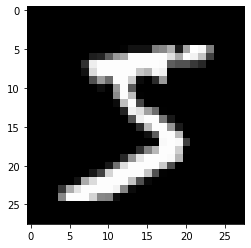

In [14]:
plt.imshow(x_train[0],cmap=plt.get_cmap('gray'))

In [15]:
from sklearn.cluster import AgglomerativeClustering

In [17]:
#reduction du nombre d'image cifar10
x_color_cut=x_train[:10000,:]
x_color_cut.shape

(10000, 28, 28)

In [18]:
#reduction du nombre d'image Mnist
xcut=x_trainrn[:10000,:]
xcut.shape

(10000, 784)

In [22]:
#fonction qui choisit différentes tailles de cluster pour trouver le nombre de cluster optimaux
list_taille_clusters=np.arange(1,160,4)
list_clusters=[]
j=0
for i in list_taille_clusters:
    clear_output(wait=True)
    print((j/len(list_taille_clusters))*100)
    ac = AgglomerativeClustering(n_clusters=i)
    clusters = ac.fit(xcut)
    list_clusters+= [clusters.labels_]
    j+=1

97.5


In [23]:
for i in range (len(list_clusters)):
    path=".\Clusters\AC"+list_taille_clusters[i].astype(str) +".npy "
    np.save(path, list_clusters[i])

In [17]:
list_clusters

[array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([4, 1, 2, ..., 4, 4, 1], dtype=int64),
 array([0, 7, 6, ..., 0, 0, 7], dtype=int64),
 array([4, 7, 5, ..., 9, 4, 7], dtype=int64),
 array([ 1,  7, 16, ...,  4,  1,  7], dtype=int64),
 array([4, 3, 7, ..., 9, 4, 3], dtype=int64),
 array([4, 1, 7, ..., 9, 4, 1], dtype=int64),
 array([ 4, 11,  1, ...,  9,  4, 11], dtype=int64),
 array([ 8, 11, 30, ...,  0, 32, 11], dtype=int64),
 array([ 3, 11, 30, ..., 16, 32, 11], dtype=int64),
 array([ 1,  5, 30, ..., 16, 32,  5], dtype=int64),
 array([20,  0, 30, ..., 16, 32,  0], dtype=int64),
 array([20, 24, 30, ..., 16, 32, 24], dtype=int64),
 array([20, 49, 30, ...,  7, 32, 49], dtype=int64),
 array([20, 49, 30, ...,  3, 15, 49], dtype=int64),
 array([ 9, 49, 30, ..., 34, 15, 49], dtype=int64),
 array([ 1, 49, 30, ..., 34, 15, 49], dtype=int64),
 array([ 9, 49, 30, ..., 34,  3, 49], dtype=int64),
 array([ 9, 49, 30, ..., 34,  1, 49], dtype=int64),
 array([ 1, 49, 30, ..., 34, 74, 49], dtype=int6